<div style="background-color:pink;">
    <h1 align="center"></h1>
    <h2 align="center">Zeynab Khorshidi</h2>
    <h3 align="center">Bike Sharing</h3>
    <h4 align="center"></h4>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
df=pd.read_csv(r'C:\Users\SibCo\Desktop\Mini Project 2 - Regression (Bike Sharing Demand)\train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape

(10886, 12)

In [9]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [12]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [13]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [14]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [15]:
df.iloc[3]

datetime      2011-01-01 03:00:00
season                          1
holiday                         0
workingday                      0
weather                         1
temp                         9.84
atemp                      14.395
humidity                       75
windspeed                     0.0
casual                          3
registered                     10
count                          13
Name: 3, dtype: object

## Data Preprocessing

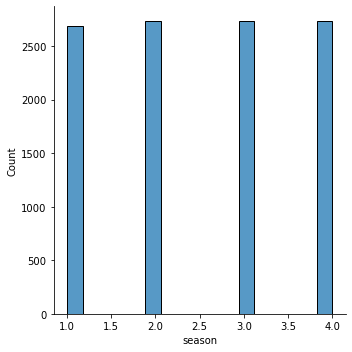

In [16]:
sns.displot(df, x="season")

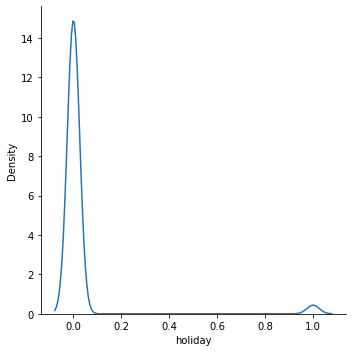

In [17]:
sns.displot(df, x="holiday",kind="kde")

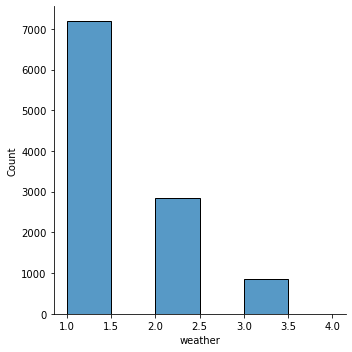

In [18]:
sns.displot(df, x="weather",bins=6)

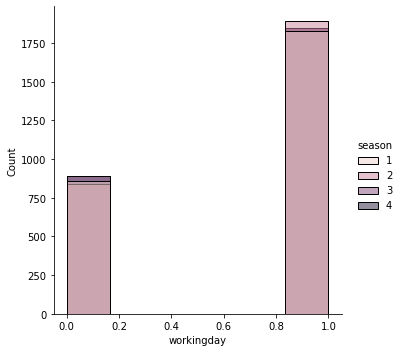

In [19]:
sns.displot(df, x="workingday",bins=6,hue='season')

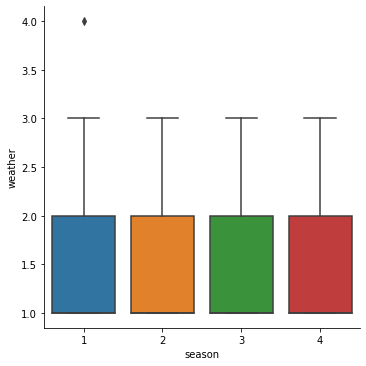

In [20]:
sns.catplot(x="season", y="weather", kind="box", data=df)

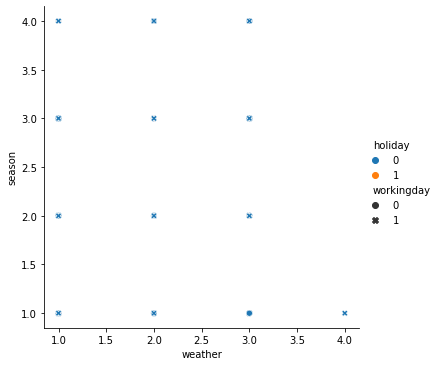

In [21]:
sns.relplot(x="weather", y="season", hue="holiday", style="workingday", data=df)

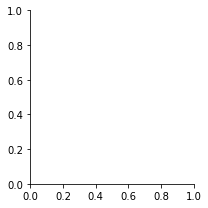

In [22]:
sns.FacetGrid(df)

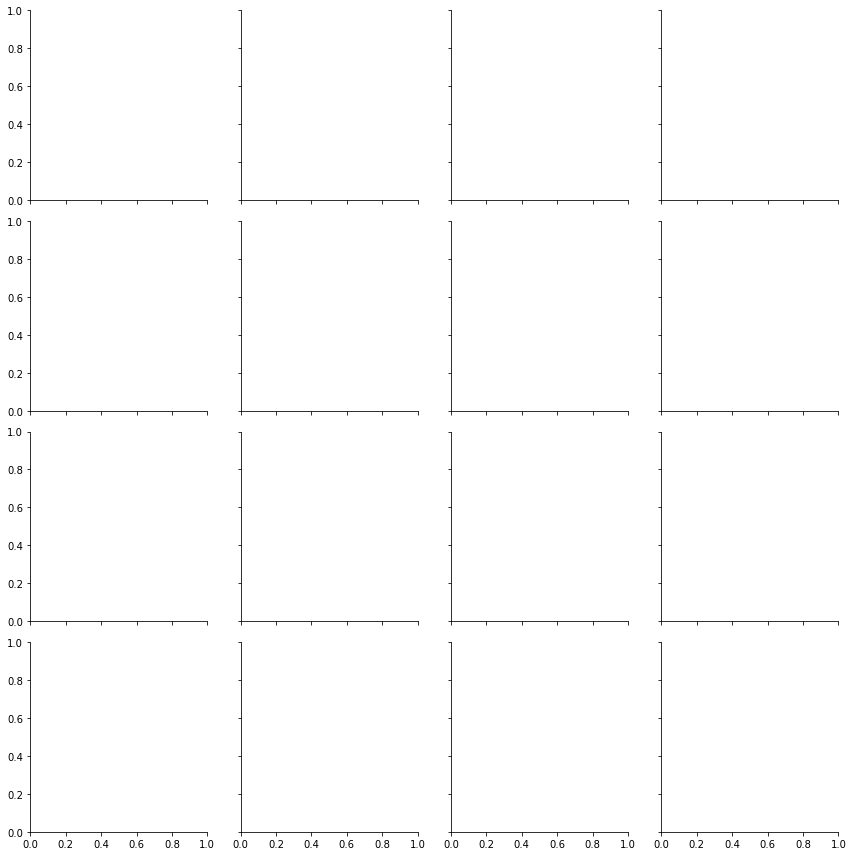

In [23]:
sns.FacetGrid(df, col="season", row="weather")

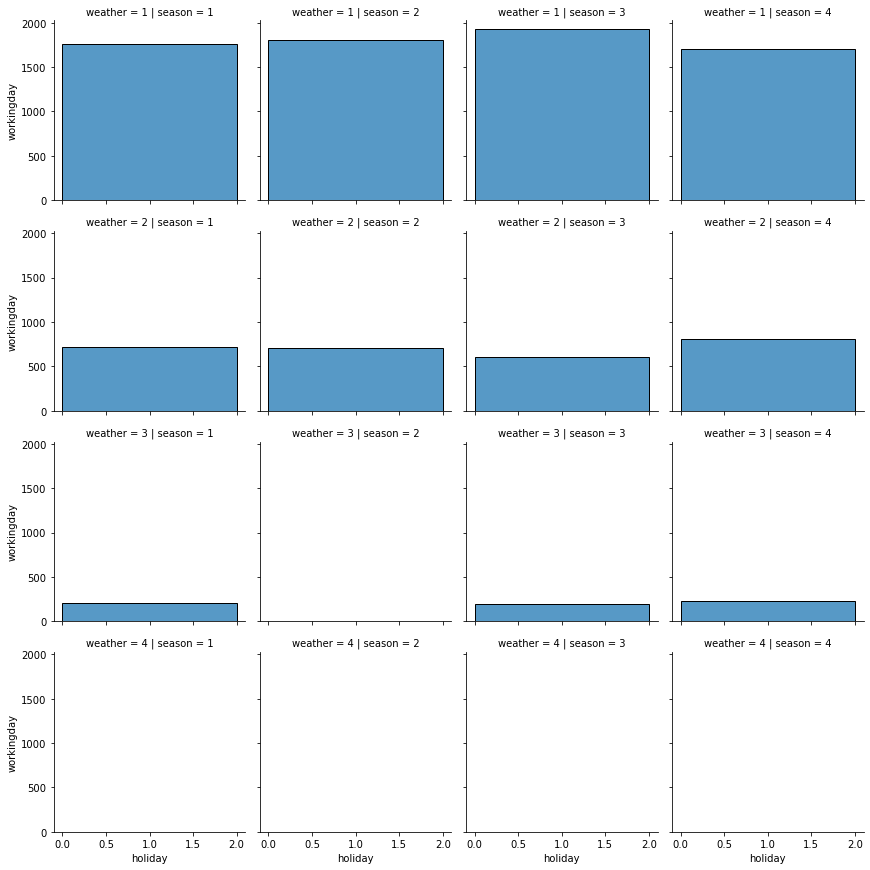

In [24]:
g = sns.FacetGrid(df, col="season", row="weather")
g.map_dataframe(sns.histplot, x="holiday", binwidth=2)
g.set_axis_labels("holiday", "workingday")

<AxesSubplot:>

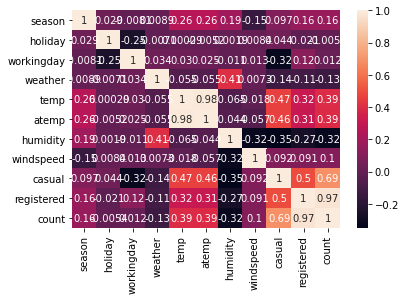

In [25]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

In [26]:
my_correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [27]:
X = df[['season','holiday']]
Y = df[['weather']]

In [28]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions=regressor.predict(X_test)

In [31]:
X_test

,season,holiday
2962,3,0
6888,2,0
8035,2,0
1120,1,0
6212,1,0
...,...,...
8528,3,0
7962,2,0
8424,3,0
7386,2,0


In [32]:
predictions[0]

array([1.42086194])

In [33]:
y_test

,weather
2962,1
6888,1
8035,1
1120,1
6212,1
...,...
8528,3
7962,2
8424,1
7386,1


<AxesSubplot:ylabel='Count'>

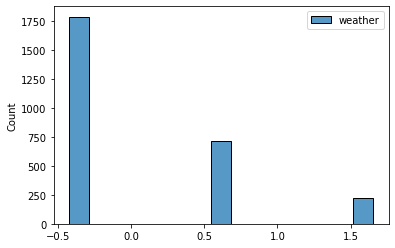

In [34]:
sns.histplot(y_test-predictions)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.5565593136365546
Mean Squared Error: 0.41044507102734656
Root Mean Squared Error: 0.6406598715600553


In [36]:
new_customer = np.array([16.99,2]).reshape(1,-1)
regressor.predict(new_customer)

array([[1.39057771]])

In [37]:
regressor.coef_

array([[ 0.00681684, -0.06282592]])

In [38]:
regressor.intercept_

array([1.40041141])

In [39]:
regressor.score

<bound method RegressorMixin.score of LinearRegression()>

In [40]:
y_pred = regressor.predict(X_train)

In [41]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.0003960496784867207
MAE: 0.5503952369526272
MSE: 0.39879111173385184
RMSE: 0.6314990987593346


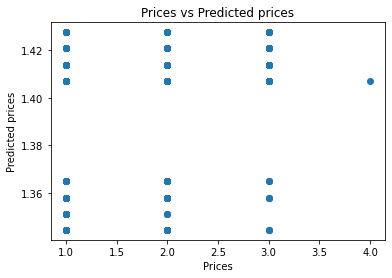

In [42]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [43]:
poly_features = PolynomialFeatures(degree=2)

X_train_quadratic = poly_features.fit_transform(X_train)
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
y_train_predicted = quadratic.predict(X_train_quadratic)

y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [44]:
metrics.r2_score(y_train, y_train_predicted)

0.0016635458387130875

In [45]:
metrics.r2_score(y_test, y_test_predicted)

0.0006339278446425567

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=26)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8164, 2)
(8164, 1)
(2722, 2)
(2722, 1)


In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [48]:
X_test

,season,holiday
2962,3,0
6888,2,0
8035,2,0
1120,1,0
6212,1,0
...,...,...
8528,3,0
7962,2,0
8424,3,0
7386,2,0


In [49]:
y_test

,weather
2962,1
6888,1
8035,1
1120,1
6212,1
...,...
8528,3
7962,2
8424,1
7386,1


In [50]:
y_pred = logreg.predict(X_test)

In [51]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.6561351947097722


In [53]:
df_dropna = df.copy()

In [54]:
print("Before:",df_dropna.shape)

df_dropna.dropna(inplace=True)

print("After:",df_dropna.shape)

Before: (10886, 12)
After: (10886, 12)


In [55]:
df_fillna = df.copy()

In [56]:
df_fillna

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [57]:
df_fillna.fillna(df_fillna.mean(), inplace=True)

print(df_fillna.isnull().sum())

df_fillna

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [58]:
X

,season,holiday
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10881,4,0
10882,4,0
10883,4,0
10884,4,0


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [60]:
pd.get_dummies(df,columns=["season"])

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1
10882,2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1
10883,2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1
10884,2012-12-19 22:00:00,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [62]:
print(Y)

       weather
0            1
1            1
2            1
3            1
4            1
...        ...
10881        1
10882        1
10883        1
10884        1
10885        1

[10886 rows x 1 columns]


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.52, random_state = 26)

In [64]:
print(X_train)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [65]:
X_train.shape

(5225, 5)

In [66]:
print(X_test)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [67]:
print(y_train)

       weather
5261         1
223          2
8979         1
1646         1
1022         1
...        ...
9318         1
10177        1
9648         1
5894         1
4917         1

[8164 rows x 1 columns]


In [68]:
print(Y_test)

      weather
2962        1
6888        1
8035        1
1120        1
6212        1
...       ...
7755        1
7215        3
1877        1
7248        2
8970        1

[5661 rows x 1 columns]


In [69]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [71]:
print(X_train)

[[ 0.          0.          0.          1.75194596 -0.16653548]
 [ 0.          0.          1.         -0.57079386 -0.16653548]
 [ 0.          0.          1.         -0.57079386 -0.16653548]
 ...
 [ 0.          0.          0.          1.75194596 -0.16653548]
 [ 1.          0.          0.         -0.57079386 -0.16653548]
 [ 0.          0.          0.          1.75194596 -0.16653548]]


In [72]:
print(X_test)

[[ 0.          0.          1.         -0.57079386 -0.16653548]
 [ 0.          1.          0.         -0.57079386 -0.16653548]
 [ 0.          1.          0.         -0.57079386 -0.16653548]
 ...
 [ 0.          1.          0.         -0.57079386 -0.16653548]
 [ 0.          1.          0.         -0.57079386 -0.16653548]
 [ 0.          0.          1.         -0.57079386 -0.16653548]]


In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [75]:
Y_pred = knn.predict(X_test)

In [76]:
knn.score(X_train, Y_train)

0.5408612440191387

In [77]:
knn.score(X_test, Y_test)

0.5370075958311252

In [78]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.64      0.73      0.68      3710
           2       0.22      0.21      0.22      1508
           3       0.00      0.00      0.00       443

    accuracy                           0.54      5661
   macro avg       0.29      0.31      0.30      5661
weighted avg       0.48      0.54      0.51      5661



<AxesSubplot:>

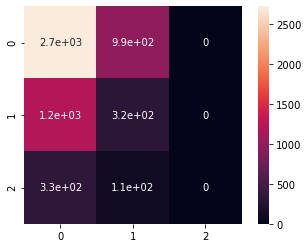

In [79]:
cm =confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, square=True , annot=True)

In [80]:
knn = KNeighborsClassifier(n_neighbors=11)

In [81]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [82]:
Y_pred = knn.predict(X_test)

In [83]:
knn.score(X_train, Y_train)

0.6662200956937799

In [84]:
knn.score(X_test, Y_test)

0.6534181240063593

In [85]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train,average='micro'))

Training Set Evaluation F1-Score=> 0.6664114832535886


In [86]:
rfc.feature_importances_

array([0.08853539, 0.10042165, 0.27780125, 0.16252476, 0.37071695])

In [87]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)